In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd()
LIB_PATH = PROJECT_ROOT / "lib"
LIB_PATH_STR = str(LIB_PATH)

#print(f"LIB_PATH: {LIB_PATH_STR}")

if LIB_PATH_STR not in sys.path:
    sys.path.append(LIB_PATH_STR)



# Import your library
from plot.plot_lib import (             # type: ignore
    bluishColorList,
    plot_pivot_bar,
    plot_hist_hue,
    sns_pivot_heatmap

)
from clean.clean_lib import (           # type: ignore
    null_data, 
    most_frequent_values,number_unique_values ) 

In [2]:
import pandas as pd

train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

In [3]:
display(train_df.head(3))

display(test_df.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## Missing data, Most Frequent Items, Unique Values

In [4]:
null_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Null,0,0,0,0,0,177,0,0,0,0,687,2
Percent Null,0.0,0.0,0.0,0.0,0.0,19.9,0.0,0.0,0.0,0.0,77.1,0.2
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [5]:
most_frequent_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequency,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total non-null,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [6]:
number_unique_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Number of uniques,891,2,3,891,2,88,7,7,681,248,147,3



<div style="margin-left:7%;width:80%;">

### **Combining Train and Test Sets with a Dataset Identifier**

We merge the original Titanic training and test datasets into a single DataFrame so that we can apply consistent data cleaning, feature engineering, and exploratory analysis across both sets. After concatenation, we create a new column called `"set"` to keep track of each row’s origin:

* All rows are initially labeled `"train"`.
* Rows that belong to the original test dataset are identified because their `Survived` value is missing (`NaN`).
* These rows are relabeled as `"test"`.

This allows us to work with a unified dataset while still being able to distinguish train from test during analysis or modeling.

</div>

In [7]:
all_df = pd.concat([train_df,test_df],axis=0)
all_df["set"] = "train"

all_df.loc[all_df.Survived.isna(),"set"] = "test"

display(all_df.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
693,694,0.0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C,train
782,783,0.0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S,train
192,193,1.0,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,train



<div style="margin-left:7%;width:80%;">

## ⭐ **3. General Introduction — Train–Test Distribution Comparison**


</div>


## 3A. Sex

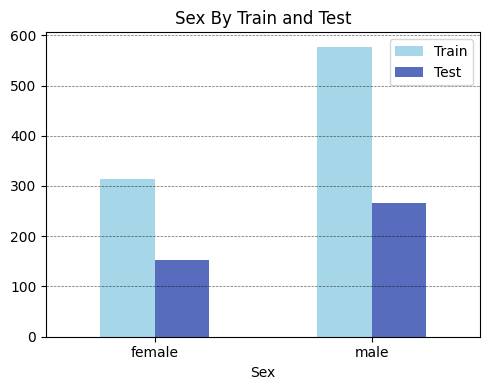

In [8]:
df_crosstab = pd.crosstab(index=all_df["Sex"],columns=all_df['set'])
df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Sex By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.5,
                         title=title,legendLabels=labels)

plt.show()

## 3B. Pclass (Passenger Class)

set,train,test
Pclass,,
1,216,107
2,184,93
3,491,218


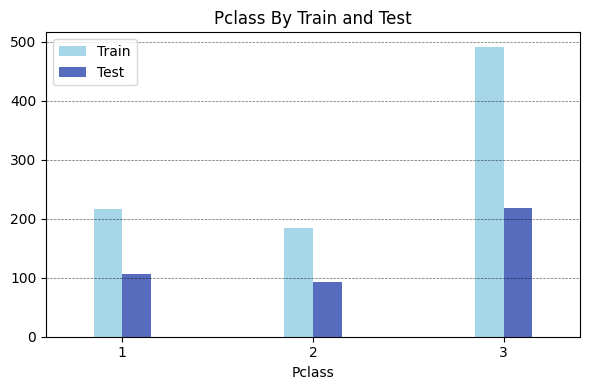

In [9]:
df_crosstab = pd.crosstab(index=all_df["Pclass"],columns=all_df["set"]) 
df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Pclass By Train and Test"
labels = ["Train","Test"]

plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),width=0.3,
                         title=title,legendLabels=labels)
df_crosstab

## 3C. SibSp (Sibling Spouse)

set,train,test
SibSp,,
0,608,283
1,209,110
2,28,14
3,16,4
4,18,4
5,5,1
8,7,2


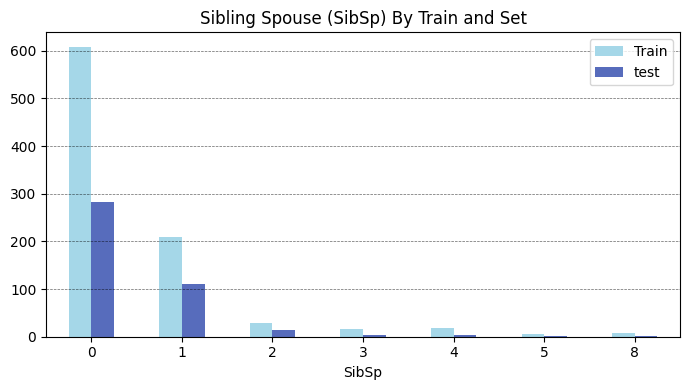

In [10]:
df_crosstab = pd.crosstab(index=all_df["SibSp"],columns=all_df["set"])

df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Sibling Spouse (SibSp) By Train and Set"
labels = ["Train","test"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

df_crosstab

## 3D. Parch (Parent Child)

set,train,test
Parch,,
0,678,324
1,118,52
2,80,33
3,5,3
4,4,2
5,5,1
6,1,1
9,0,2


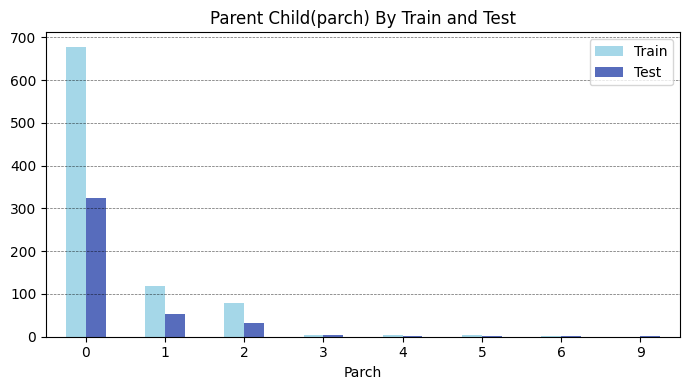

In [11]:
df_crosstab = pd.crosstab(index=all_df["Parch"],columns=all_df["set"])

# reindex or reorder columns
df_crosstab = df_crosstab.reindex(columns=["train","test"])

display(df_crosstab)

title = "Parent Child(parch) By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)
plt.show()

## 3E. Embarked

In [12]:
train_df.loc[train_df.Embarked.isna(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
# Drop rows where Embarked is missing
all_df = all_df.dropna(subset=["Embarked"]).reset_index(drop=True)
train_df = train_df.dropna(subset=["Embarked"]).reset_index(drop=True)


set,train,test
Embarked,,
C,168,102
Q,77,46
S,644,270


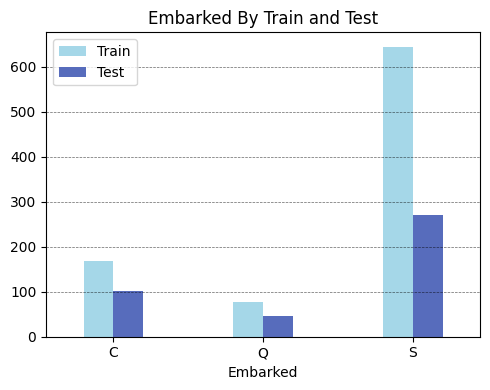

In [14]:
df_crosstab = pd.crosstab(index=all_df["Embarked"],columns=all_df["set"])
df_crosstab = df_crosstab.reindex(columns=["train","test"])
display(df_crosstab)

title = "Embarked By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.4,
                         title=title,legendLabels=labels)

plt.show()

## 3F. Age

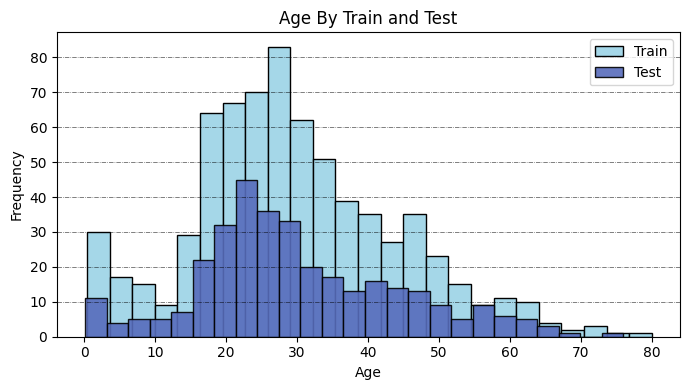

In [15]:
title = "Age By Train and Test"
labels = ["Train","Test"]

plt,_,_ = plot_hist_hue(all_df,feature="Age",hue="set",
                title=title,legendLabels=labels)
plt.show()

## 3G. Fare

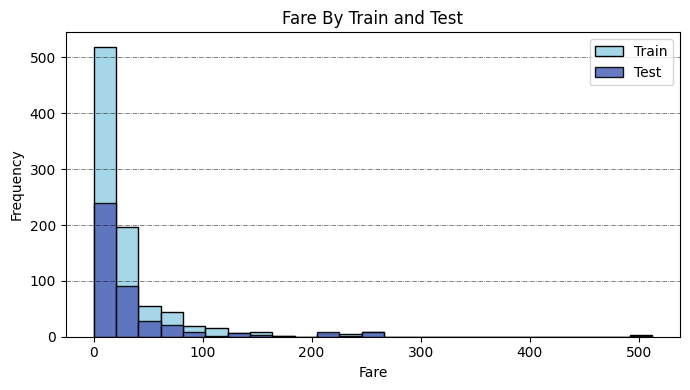

In [16]:
title = "Fare By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_hist_hue(all_df,feature="Fare",hue="set",
              title=title,legendLabels=labels)

## 4. Bivariate Analysis

### 4A. Sex and Survived

Survived,0.0,1.0
Sex,,
female,81,231
male,468,109


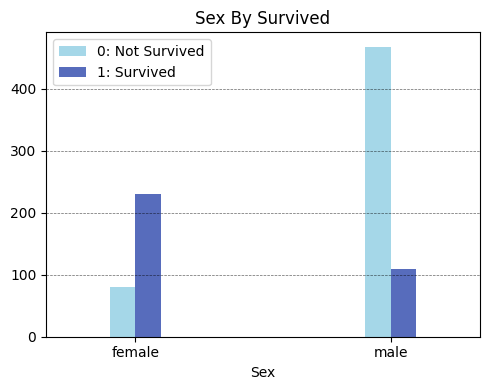

In [17]:
df_crosstab = pd.crosstab(index=all_df["Sex"],columns=all_df["Survived"])

display(df_crosstab)
title="Sex By Survived"
labels=["0: Not Survived","1: Survived"]

plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.2,
                           title=title,legendLabels=labels)

plt.show()

### 4B. Pclass and Survived

Survived,0.0,1.0
Pclass,,
1,80,134
2,97,87
3,372,119


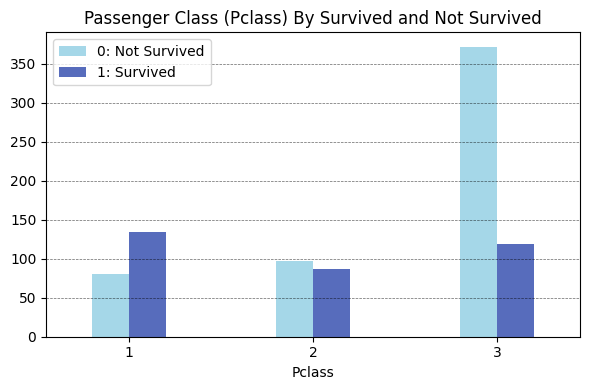

In [18]:
df_crosstab = pd.crosstab(index=all_df["Pclass"],columns=all_df["Survived"])
display(df_crosstab)

title = "Passenger Class (Pclass) By Survived and Not Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),width=0.4,
                         title=title,legendLabels=labels)

### 4C. SibSp (Siblings or Spouse) and Survived

Survived,0.0,1.0
SibSp,,
0,398,208
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


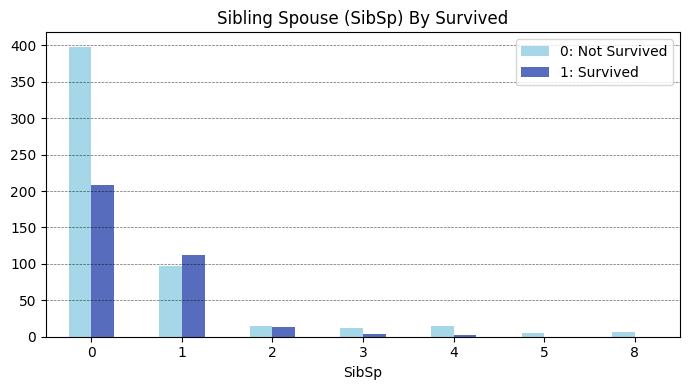

In [19]:
df_crosstab = pd.crosstab(index=all_df["SibSp"],columns=all_df["Survived"])
display(df_crosstab)

title = "Sibling Spouse (SibSp) By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4D. Embarked and Survived

<div style="margin-left:7%;width:75%;">

In the **Titanic dataset**, the `Embarked` column tells you **which port each passenger boarded the ship from**.

There are **three possible values**:

| Code  | Port Name       | Country            | Description                                     |
| ----- | --------------- | ------------------ | ----------------------------------------------- |
| **S** | **Southampton** | England (UK)       | The majority of passengers boarded here.        |
| **C** | **Cherbourg**   | France             | Wealthier passengers often embarked here.       |
| **Q** | **Queenstown**  | Ireland (now Cobh) | Typically emigrants and lower-class passengers. |

---


</div>


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


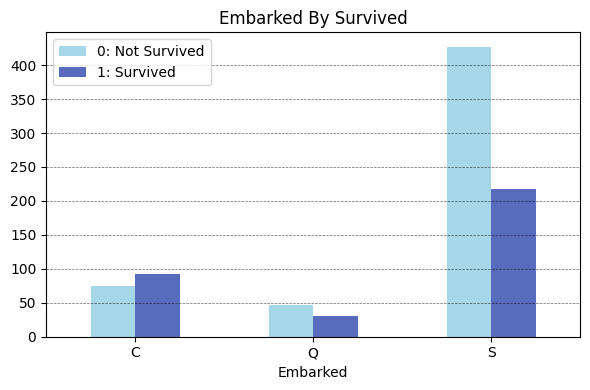

In [20]:
df_crosstab = pd.crosstab(index=train_df["Embarked"],columns=train_df["Survived"])

display(df_crosstab)

title = "Embarked By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),
                         title=title,legendLabels=labels)

### 4E. Age and Survived (Continuous Variable)

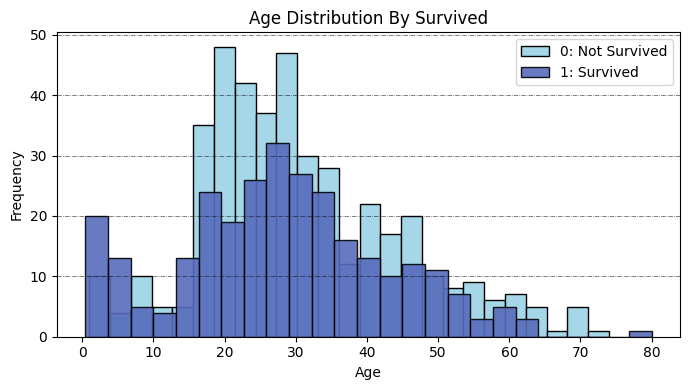

In [21]:
title="Age Distribution By Survived"
labels=["0: Not Survived","1: Survived"]

plt,_,_ = plot_hist_hue(train_df, feature="Age", hue="Survived",
                        title=title,legendLabels=labels)

### 4F. Fare and Survived (Continuous Variable)

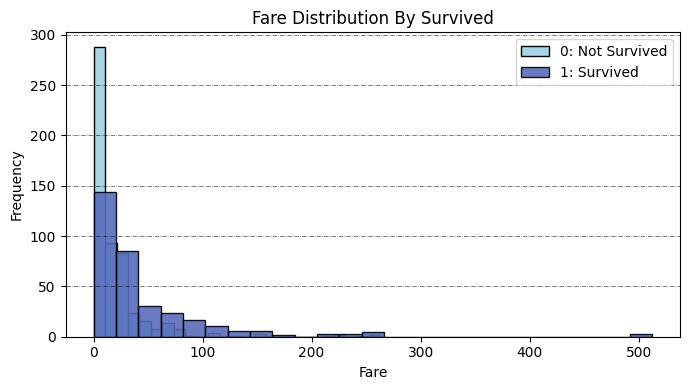

In [22]:
title="Fare Distribution By Survived"
labels=["0: Not Survived","1: Survived"]
plt,_,_ = plot_hist_hue(all_df, "Fare", hue="Survived",
                        title=title,legendLabels=labels)

### 4G. Family Size (Feature Engineering; discrete variable)


<div style="margin-left:6%;width:80%" >


### The columns involved

In the Titanic dataset, you have:

| Column  | Meaning                                       |
| ------- | --------------------------------------------- |
| `SibSp` | Number of **siblings** and **spouses** aboard |
| `Parch` | Number of **parents** and **children** aboard |

So:

* `SibSp = 1` → the passenger had one sibling/spouse on board
* `Parch = 2` → the passenger had two parents/children on board

But both exclude the passenger themself.

---

### Why we add them up (and +1)

```python
all_df["Family Size"] = all_df["SibSp"] + all_df["Parch"] + 1
```



1. `SibSp + Parch` = number of *relatives* aboard
2. `+1` = include the passenger themself

That gives the **total number of family members traveling together**, *including the passenger* — a simple but powerful engineered feature called **Family Size**.



</div>


In [23]:
all_df['Family Size'] = all_df['SibSp'] + all_df['Parch'] + 1
train_df['Family Size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [24]:
all_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set,Family Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,1


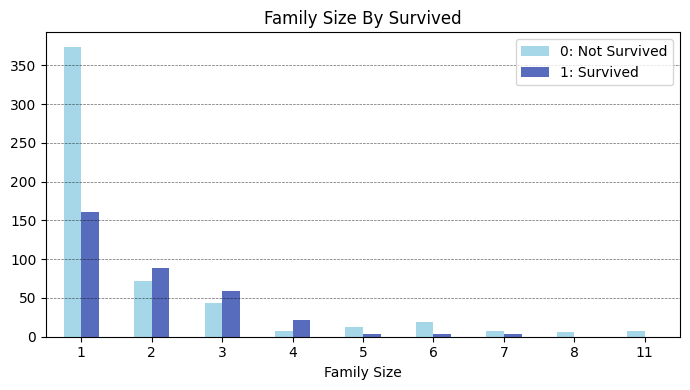

In [25]:
df_crosstab = pd.crosstab(index=train_df["Family Size"],columns=train_df["Survived"])

title = "Family Size By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4H. Age Interval


**Age Interval Encoding**

The *Age Interval* column categorizes individuals into discrete age bands based on predefined thresholds that represent broad life-stage groupings.

**Interval definitions**

| Interval | Age Range        | Description               |
|----------|------------------|---------------------------|
| 0        | Age ≤ 16         | children                  |
| 1        | 16 < Age ≤ 32    | young adults              |
| 2        | 32 < Age ≤ 48    | early middle-aged adults  |
| 3        | 48 < Age ≤ 64    | late middle-aged adults   |
| 4        | Age > 64         | seniors                   |


Missing age values (NaN) are explicitly preserved as **NA** to avoid misclassification and to maintain data integrity.






In [26]:
null_data(all_df[["Age"]])

,Age
Total Null,263
Percent Null,20.1
Types,float64


In [27]:
all_df["Age Interval"] = 0
all_df.loc[all_df["Age"]<=16,"Age Interval"] = 0
all_df.loc[(all_df["Age"]>16) & (all_df["Age"]<=32), "Age Interval"] = 1
all_df.loc[(all_df["Age"]>32) & (all_df["Age"]<=48), "Age Interval"] = 2
all_df.loc[(all_df["Age"]>48) & (all_df["Age"]<=64), "Age Interval"] = 3
all_df.loc[all_df["Age"]>64, "Age Interval"] = 4
all_df.loc[all_df["Age"].isna(),"Age Interval"] = pd.NA

train_df["Age Interval"] = 0
train_df.loc[train_df["Age"] <= 16, "Age Interval"] = 0
train_df.loc[(train_df["Age"] > 16) & (train_df["Age"] <= 32), "Age Interval"] = 1
train_df.loc[(train_df["Age"] > 32) & (train_df["Age"] <= 48), "Age Interval"] = 2
train_df.loc[(train_df["Age"] > 48) & (train_df["Age"] <= 64), "Age Interval"] = 3
train_df.loc[train_df["Age"] > 64, "Age Interval"] = 4

train_df.loc[train_df["Age"].isna(), "Age Interval"] = pd.NA

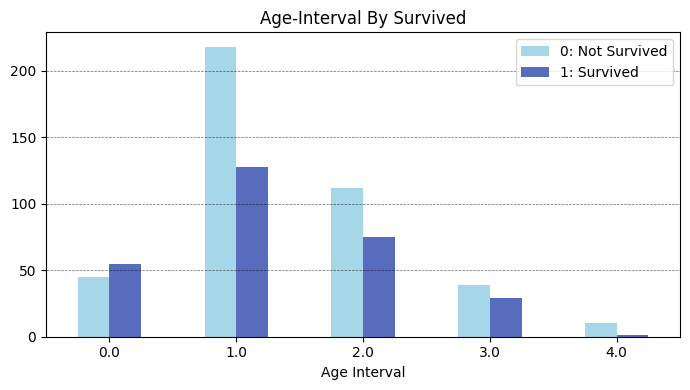

In [28]:
df_crosstab = pd.crosstab(index=train_df["Age Interval"],columns=train_df["Survived"])

title = "Age-Interval By Survived"
labels = ["0: Not Survived","1: Survived"]

plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4I. Fare 

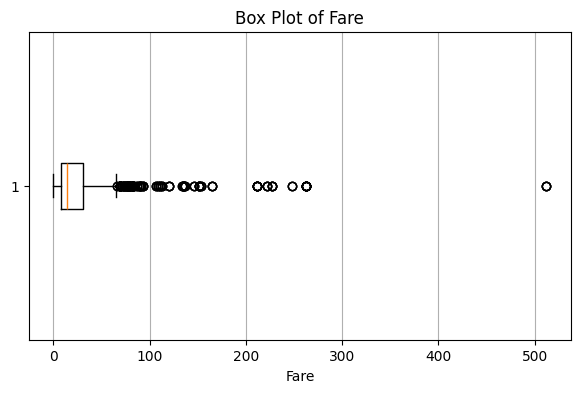

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.boxplot(all_df["Fare"].dropna(), vert=False)


plt.grid(axis="x")
plt.title("Box Plot of Fare")
plt.xlabel("Fare")
plt.show()


> The Fare distribution is strongly right-skewed with a long right tail. Most observations cluster >at lower values, while a small number of high fares extend far beyond the upper quartile, >producing many high-end outliers under the IQR rule.

In [30]:
all_df['Fare'].quantile([0.25, 0.5, 0.75])

0.25     7.8958
0.50    14.4542
0.75    31.2750
Name: Fare, dtype: float64

| Fare Interval      | Socioeconomic Meaning                         |
| ------------------ | --------------------------------------------- |
| **0 (≤ 7.91)**     | Very poor, 3rd class, mostly men, lower decks |
| **1 (7.91–14.45)** | Lower middle, still mostly 3rd class          |
| **2 (14.45–31)**   | Middle class travelers                        |
| **3 (> 31)**       | Wealthiest passengers, mainly 1st class       |


In [31]:
all_df['Fare Interval'] = pd.qcut(all_df['Fare'], q=4, labels=[0,1,2,3])
train_df['Fare Interval'] = pd.qcut(train_df['Fare'], q=4, labels=[0,1,2,3])

null_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Age Interval,Fare Interval
Total Null,0,0,0,0,0,177,0,0,0,0,687,0,0,177,0
Percent Null,0.0,0.0,0.0,0.0,0.0,19.9,0.0,0.0,0.0,0.0,77.3,0.0,0.0,19.9,0.0
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object,int64,float64,category


Survived,0,1
Fare Interval,,
0,179,44
1,156,68
2,121,101
3,93,127


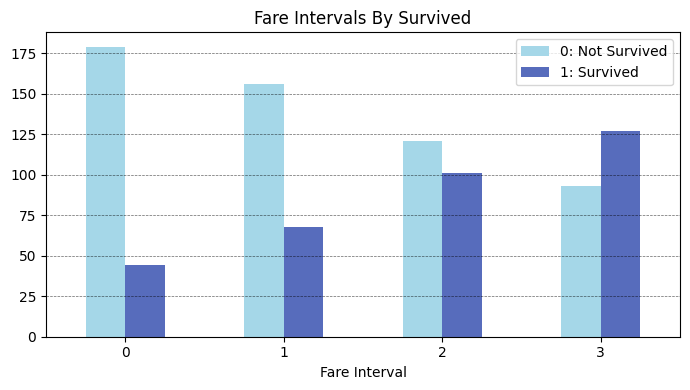

In [32]:
df_crosstab = pd.crosstab(index=train_df["Fare Interval"],columns=train_df["Survived"])
display(df_crosstab)

title = "Fare Intervals By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4J. Deck -- from Cabin

In [33]:
all_df["Cabin"].value_counts(dropna=False)

Cabin
NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 186, dtype: int64

<div style="margin-left:6%;width:70%;">

### Why `Cabin` was transformed into `Deck`

The original `Cabin` feature contains **high-cardinality, sparsely populated values** (e.g., `C23 C25 C27`) and a **large number of missing entries**, making it noisy and difficult to analyze directly.

The **first character of the cabin code** represents the ship’s **deck level** (`A`, `B`, `C`, …), which captures meaningful spatial and socioeconomic information.

By extracting this letter and renaming the feature to `Deck`, we:

* Reduce cardinality to a small, interpretable set of categories  
* Preserve signal relevant to survival (deck location correlates with class and lifeboat access)  
* Improve robustness by grouping noisy cabin variants  
* Handle missing values explicitly via an `"Unknown"` category  

This turns a **raw identifier-like field** into a **clean, domain-informed categorical feature** suitable for EDA and modeling.

</div>


In [34]:
def get_deck(text):
    try:
        return text[0]
    except Exception as ex:
        return "Unknown"

In [35]:
all_df["Deck"] = all_df["Cabin"].apply(lambda x: get_deck(x))
train_df["Deck"] = train_df["Cabin"].apply(lambda x: get_deck(x))

In [36]:
display(all_df["Deck"].value_counts(dropna=False))
print("-------------------")
display(train_df["Deck"].value_counts(dropna=False))

Deck
Unknown    1014
C            94
B            63
D            46
E            41
A            22
F            21
G             5
T             1
Name: count, dtype: int64

-------------------


Deck
Unknown    687
C           59
B           45
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

Survived,0,1
Deck,,
A,8,7
B,12,33
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
Unknown,481,206


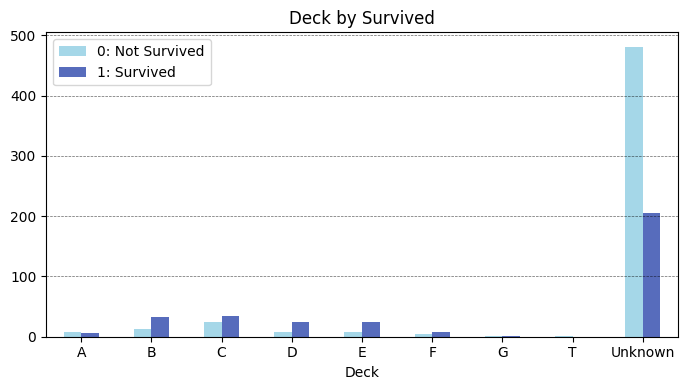

In [37]:
df_crosstab = pd.crosstab(index=train_df['Deck'],columns=train_df['Survived'])
display(df_crosstab)

title = "Deck by Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

### 4K. Sex + Pclass (Feature Engineering)

In [38]:
all_df["Sex_Pclass"] = all_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

train_df["Sex_Pclass"] = train_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

In [39]:
train_df["Sex_Pclass"].dtype 

dtype('O')

#### Encode Sex–Class Interaction as an Ordered Categorical Feature

In [40]:
ordered_cats = ["M_C1","M_C2","M_C3","F_C1","F_C2","F_C3"]

all_df["Sex_Pclass"] = pd.Categorical(
    all_df["Sex_Pclass"],
    categories=ordered_cats,
    ordered=True
)

train_df["Sex_Pclass"] = pd.Categorical(
    train_df["Sex_Pclass"],
    categories=ordered_cats,
    ordered=True
)


In [41]:
train_df["Sex_Pclass"].dtype

CategoricalDtype(categories=['M_C1', 'M_C2', 'M_C3', 'F_C1', 'F_C2', 'F_C3'], ordered=True, categories_dtype=object)

Survived,0,1
Sex_Pclass,,
M_C1,77,45
M_C2,91,17
M_C3,300,47
F_C1,3,89
F_C2,6,70
F_C3,72,72


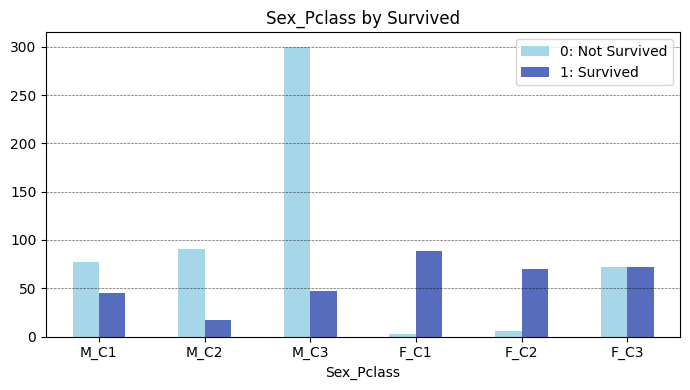

In [42]:
df_crosstab = pd.crosstab(index=train_df["Sex_Pclass"],columns=train_df["Survived"])
display(df_crosstab)

title = "Sex_Pclass by Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)
plt.show()

## 5. Names

In [43]:
all_df.Name.sample(20)

957                       Tucker, Mr. Gilbert Milligan Jr
322     Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...
809                                Alexander, Mr. William
855                                Daly, Mr. Peter Denis 
681                           Olsvigen, Mr. Thor Anderson
138                                    Giglio, Mr. Victor
1196                            Aks, Master. Philip Frank
870                              Carlsson, Mr. Frans Olof
430     Thorneycroft, Mrs. Percival (Florence Kate White)
765                             Brewe, Dr. Arthur Jackson
217                                 Bazzani, Miss. Albina
307                                   Abelson, Mr. Samuel
683                     Brown, Mr. Thomas William Solomon
1048                  Peacock, Mrs. Benjamin (Edith Nile)
266                              Persson, Mr. Ernst Ulrik
955                               Burns, Miss. Mary Delia
934                       Peltomaki, Mr. Nikolai Johannes
386           

In [44]:
def parse_names(row):
    try:
        text = row["Name"]
        #print(f"-- text: {text}")
        split_text = text.split(",")
        family_name = split_text[0]
        next_text = split_text[1]
        split_text = next_text.split(".")
        title = (split_text[0] + ".").lstrip().rstrip()
        next_text = split_text[1]
        if "(" in next_text:
            split_text = next_text.split("(")
            given_name = split_text[0]
            maiden_name = split_text[1].rstrip(")")
            return pd.Series([family_name,title,given_name,maiden_name])
        else:
            given_name = next_text
            return pd.Series([family_name,title,given_name,None])
    except Exception as ex:
        print(f"Exception: {ex}")

In [45]:
all_df[:2].apply(lambda row: parse_names(row),axis=1)

,0,1,2,3
0,Braund,Mr.,Owen Harris,None
1,Cumings,Mrs.,John Bradley,Florence Briggs Thayer


In [46]:

all_df[['Family Name','Title','Given Name','Maiden Name']] = \
                    all_df.apply(lambda row: parse_names(row),axis=1)


columns = ['Sex','Family Name','Title','Given Name','Maiden Name']
all_df.loc[:3,columns]

,Sex,Family Name,Title,Given Name,Maiden Name
0,male,Braund,Mr.,Owen Harris,None
1,female,Cumings,Mrs.,John Bradley,Florence Briggs Thayer
2,female,Heikkinen,Miss.,Laina,None
3,female,Futrelle,Mrs.,Jacques Heath,Lily May Peel


In [47]:

train_df[['Family Name','Title','Given Name','Maiden Name']] = \
                    all_df.apply(lambda row: parse_names(row),axis=1)


columns = ['Sex','Family Name','Title','Given Name','Maiden Name']
train_df.loc[:3,columns]

,Sex,Family Name,Title,Given Name,Maiden Name
0,male,Braund,Mr.,Owen Harris,None
1,female,Cumings,Mrs.,John Bradley,Florence Briggs Thayer
2,female,Heikkinen,Miss.,Laina,None
3,female,Futrelle,Mrs.,Jacques Heath,Lily May Peel


In [48]:
train_df.Title.value_counts(dropna=False)

Title
Mr.              517
Miss.            181
Mrs.             124
Master.           40
Dr.                7
Rev.               6
Mlle.              2
Major.             2
Col.               2
the Countess.      1
Capt.              1
Ms.                1
Sir.               1
Lady.              1
Mme.               1
Don.               1
Jonkheer.          1
Name: count, dtype: int64

<div style="margin-left:7%;width:75%;">

# Summary Table (Simplified Meaning)

| Title                                              | Meaning                            |
| -------------------------------------------------- | ---------------------------------- |
| Mr.                                                | Adult male                         |
| Miss.                                              | Unmarried female                   |
| Mrs.                                               | Married female                     |
| Master.                                            | Male child                         |
| Rev.                                               | Clergyman                          |
| Dr.                                                | Doctor / academic                  |
| Col., Major, Capt.                                 | Military officers                  |
| Mlle., Mme.                                        | French titles (Miss / Mrs.)        |
| Ms.                                                | Woman (marital status unspecified) |
| Lady., Sir., the Countess., Don., Dona., Jonkheer. | Nobility / aristocracy             |

---

# Why Titles Matter in Titanic Analysis

They correlate strongly with:

* **Survival probability**
* **Gender**
* **Age**
* **Social class**
* **Family structure**

Titles were one of the **top predictive features** in the famous Kaggle Titanic competition.

</div>

### 5A. Title vs Sex Heatmap

Sex,female,male
Title,,
Capt.,0,1
Col.,0,4
Don.,0,1
Dona.,1,0
Dr.,1,7
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,61


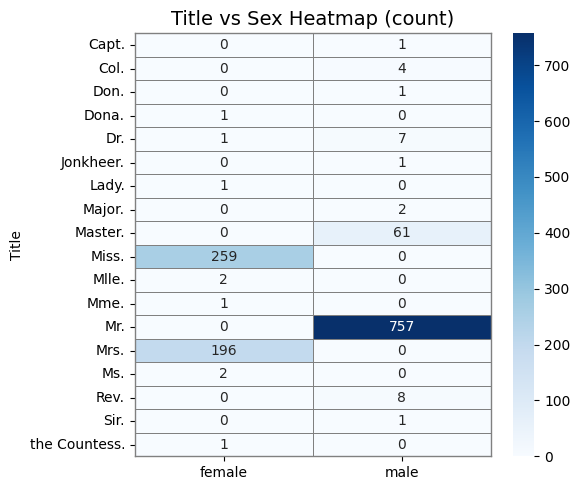

In [49]:
df_crosstab = pd.crosstab(index=all_df["Title"],columns=all_df["Sex"])
display(df_crosstab)

title = "Title vs Sex Heatmap (count)"
xlabel, ylabel = "", "Title"
plt,_,_ = sns_pivot_heatmap(df_crosstab,title=title,xLabel=xlabel,yLabel=ylabel)
plt.show()

### 5B. Title vs SibSp Heatmap

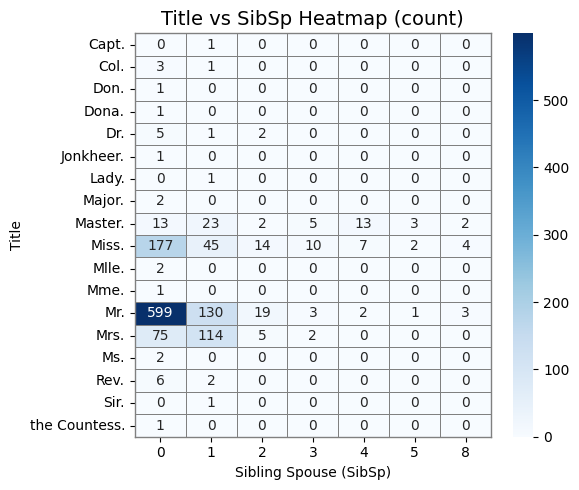

In [50]:
df_crosstab = pd.crosstab(index=all_df["Title"],columns=all_df["SibSp"])

title = "Title vs SibSp Heatmap (count)"
xlabel, ylabel = "Sibling Spouse (SibSp)", "Title"

plt,_,_ = sns_pivot_heatmap(df_crosstab,
                            title=title,xLabel=xlabel,yLabel=ylabel)

### 5C. Title vs ParentChild (Parch) Heatmap

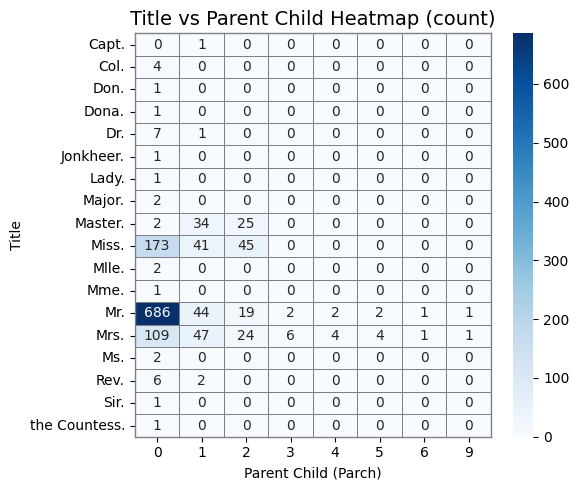

In [51]:
df_crosstab = pd.crosstab(all_df['Title'], all_df['Parch'])
title = "Title vs Parent Child Heatmap (count)"
xlabel,ylabel = "Parent Child (Parch)","Title"

plt,_,_ = sns_pivot_heatmap(df_crosstab,
                            title=title,xLabel=xlabel,yLabel=ylabel)